In [30]:
# Dependencies
import json
import tweepy 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [31]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [32]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [33]:
# Target User
# Target Account
target_user = ['@BBC','@CBSNews', '@CNN', '@FoxNews', '@nytimes']

# Variables for holding sentiments
sentiments = []

for news in target_user:
    # Counter
    counter = 1

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(news, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Outlet": news,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1

In [34]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Outlet,Positive,Tweets Ago
0,0.0000,Sat Jul 21 16:04:04 +0000 2018,1.000,0.000,@BBC,0.000,1
1,0.0000,Sat Jul 21 15:04:19 +0000 2018,1.000,0.000,@BBC,0.000,2
2,0.8126,Sat Jul 21 15:04:02 +0000 2018,0.630,0.000,@BBC,0.370,3
3,0.2023,Sat Jul 21 14:03:06 +0000 2018,0.648,0.139,@BBC,0.213,4
4,0.0000,Sat Jul 21 13:03:08 +0000 2018,1.000,0.000,@BBC,0.000,5


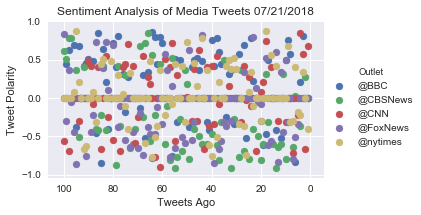

In [40]:
fg = seaborn.FacetGrid(data=  sentiments_pd, hue= 'Outlet',  aspect=1.61)
fg.map(plt.scatter, 'Tweets Ago', 'Compound').add_legend()
axes = fg.axes.flatten()
fg.fig.axes[0].invert_xaxis()
axes[0].set_title("Sentiment Analysis of Media Tweets 07/21/2018")
axes[0].set_ylabel('Tweet Polarity')
axes[0].set_xlabel('Tweets Ago')
seaborn.set()
fg.savefig("Sentiment_Analysis.png")

In [41]:
grouped_sentiment= sentiments_pd.groupby(['Outlet'])

In [44]:
sentiment_sum = grouped_sentiment["Compound"].mean()
sentiment_sum.head()

Outlet
@BBC        0.158804
@CBSNews   -0.150711
@CNN        0.012256
@FoxNews   -0.103160
@nytimes    0.035042
Name: Compound, dtype: float64

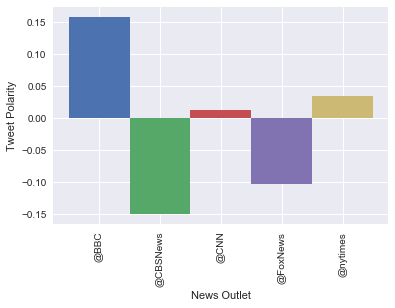

In [49]:
# Create a bar chart based off of the group series from before
sum_chart = sentiment_sum.plot(kind='bar', width = 1.0)

# Set the xlabel and ylabel using class methods
sum_chart.set_xlabel("News Outlet")
sum_chart.set_ylabel("Tweet Polarity")

plt.savefig('bar_chart.png')
plt.show()

In [48]:
sentiments_pd.to_csv('sentiments', sep='\t')